# Heart Failure Prediction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.

# Import the Required Libararies

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Import DataSet + The Idea of the project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.shape

(918, 12)

# Data Analysis And Manipulation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=918, step=1)

In [8]:
data.values

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [9]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
data["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [11]:
data["HeartDisease"].nunique()

2

In [12]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [13]:
data.insert(2,"CHOL+2",data.Cholesterol+2)

In [14]:
data

,Age,Sex,CHOL+2,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,291,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,182,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,285,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,216,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,197,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,266,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,195,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,133,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,238,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
data.drop("CHOL+2",axis=1,inplace=True)

In [16]:
data.Age.mean()

53.510893246187365

In [17]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [18]:
data.sort_index()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
data.Age.sort_index()

0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64

In [20]:
data[["Age","Cholesterol"]].sort_index()

,Age,Cholesterol
0,40,289
1,49,180
2,37,283
3,48,214
4,54,195
...,...,...
913,45,264
914,68,193
915,57,131
916,57,236


In [21]:
data[["Age","Cholesterol"]].sort_values(by = "Age",ascending = False)

,Age,Cholesterol
814,77,304
447,77,171
688,76,197
541,76,113
556,75,310
...,...,...
215,30,237
219,29,263
829,29,204
170,29,243


In [22]:
 data.loc[(data.Age>35)&(data.Cholesterol<180)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
31,56,M,NAP,130,167,0,Normal,114,N,0.0,Up,0
33,41,M,ASY,130,172,0,ST,130,N,2.0,Flat,1
38,48,F,ATA,120,177,1,ST,148,N,0.0,Up,0
44,43,M,ASY,120,175,0,Normal,120,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [23]:
data.filter(like='22', axis=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
22,49,F,ATA,124,201,0,Normal,164,N,0.0,Up,0
122,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0
220,46,M,ASY,130,222,0,Normal,112,N,0.0,Flat,1
221,51,F,ASY,160,303,0,Normal,150,Y,1.0,Flat,1
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0
223,33,M,NAP,120,298,0,Normal,185,N,0.0,Up,0
224,55,M,ATA,120,256,1,Normal,137,N,0.0,Up,0
225,50,M,ASY,145,264,0,Normal,150,N,0.0,Flat,1
226,53,M,NAP,120,195,0,Normal,140,N,0.0,Up,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1


In [24]:
data.where(data.Age>18,False)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [25]:
data.duplicated(subset="Age").sum()

868

In [26]:
data.drop_duplicates(subset="Age").sum()

Age                                                            2625
Sex               MFMFMMFMFMFMMMMMMMMMMMMMFMMMMMMMFFMFMFMMMFMMFM...
ChestPainType     ATANAPATAASYNAPNAPATAATANAPASYATAASYATAATAASYA...
RestingBP                                                      6660
Cholesterol                                                    9551
FastingBS                                                         6
RestingECG        NormalNormalSTNormalNormalNormalNormalSTSTNorm...
MaxHR                                                          6733
ExerciseAngina    NNNYNNNYNNNNNNYNNNNNYNYNYYYYYNYNYYNNNNNNNNNNNY...
Oldpeak                                                        42.1
ST_Slope          UpFlatUpFlatUpUpUpFlatUpFlatUpFlatFlatFlatFlat...
HeartDisease                                                     27
dtype: object

# Missing Values 
To solve missing values problem there is [] ways 
#1- Drop the column that the missing values in it .  data.drop(["Coulmn name"],axis=1)  (NOT EFFICIENT)
#2- Drop the Rows that the missing values in it .    data.dropna()                      (NOT EFFICIENT)
#3- Fill the Null values  .           data.fillna(value) or data.["Coulmn name"].fillna("value") or with method="ffill"
Or fill with the Mean value of the column                                              (EFFICIENT)
#4- Interpolate Method                                                                  (EFFICIENT)
#5- Imputer Class it put the mean of the column in the missing value by default         (EFFICIENT)
#6- REMEMPER TO PUT Inplace = True 

In [27]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [29]:
data.notnull().sum()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# CATEGORICAL DATA
#1- Drop categorical variables (not usefull imformation)
#2- Replaceing values
#3- Encoding values 
#4- One Hot Encoder

In [31]:
data.drop("FastingBS",axis=1,inplace=True)

In [32]:
data.Sex=data.Sex.str.replace("Maleale","M")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


In [33]:
data.Sex=data.Sex.str.replace("Feeemaleemale","F")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


In [35]:
data.Sex=data.Sex.astype('string')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(4), string(1)
memory usage: 79.0+ KB


In [37]:
data.rename({"HeartDisease":"HD"},axis=1,inplace=True)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


In [38]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [39]:
data.ST_Slope.map({'Up':1,'Flat':2,'Down':3})

0      1
1      2
2      1
3      2
4      1
      ..
913    2
914    2
915    2
916    2
917    1
Name: ST_Slope, Length: 918, dtype: int64

In [40]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [42]:
le = LabelEncoder()

In [43]:
data.ST_Slope=le.fit_transform(data.ST_Slope)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,Normal,172,N,0.0,2,0
1,49,F,NAP,160,180,Normal,156,N,1.0,1,1
2,37,M,ATA,130,283,ST,98,N,0.0,2,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,1,1
4,54,M,NAP,150,195,Normal,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,1,1
914,68,M,ASY,144,193,Normal,141,N,3.4,1,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,1,1
916,57,F,ATA,130,236,LVH,174,N,0.0,1,1


In [44]:
oh = OneHotEncoder()

In [45]:
oh_Values=pd.DataFrame(oh.fit_transform(data[["RestingECG"]]))
oh_Values

,0
0,"(0, 1)\t1.0"
1,"(0, 1)\t1.0"
2,"(0, 2)\t1.0"
3,"(0, 1)\t1.0"
4,"(0, 1)\t1.0"
...,...
913,"(0, 1)\t1.0"
914,"(0, 1)\t1.0"
915,"(0, 1)\t1.0"
916,"(0, 0)\t1.0"


In [46]:
data.drop("RestingECG",axis=1,inplace=True)

In [47]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,172,N,0.0,2,0
1,49,F,NAP,160,180,156,N,1.0,1,1
2,37,M,ATA,130,283,98,N,0.0,2,0
3,48,F,ASY,138,214,108,Y,1.5,1,1
4,54,M,NAP,150,195,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1
914,68,M,ASY,144,193,141,N,3.4,1,1
915,57,M,ASY,130,131,115,Y,1.2,1,1
916,57,F,ATA,130,236,174,N,0.0,1,1


In [48]:
new_data=pd.concat([data,oh_Values],axis=1)

In [49]:
new_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD,0
0,40,M,ATA,140,289,172,N,0.0,2,0,"(0, 1)\t1.0"
1,49,F,NAP,160,180,156,N,1.0,1,1,"(0, 1)\t1.0"
2,37,M,ATA,130,283,98,N,0.0,2,0,"(0, 2)\t1.0"
3,48,F,ASY,138,214,108,Y,1.5,1,1,"(0, 1)\t1.0"
4,54,M,NAP,150,195,122,N,0.0,2,0,"(0, 1)\t1.0"
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1,"(0, 1)\t1.0"
914,68,M,ASY,144,193,141,N,3.4,1,1,"(0, 1)\t1.0"
915,57,M,ASY,130,131,115,Y,1.2,1,1,"(0, 1)\t1.0"
916,57,F,ATA,130,236,174,N,0.0,1,1,"(0, 0)\t1.0"


# Data Visualisation

In [50]:
x=np.arange(0,20)
y=np.cos(x)
y

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362,
        0.28366219,  0.96017029,  0.75390225, -0.14550003, -0.91113026,
       -0.83907153,  0.0044257 ,  0.84385396,  0.90744678,  0.13673722,
       -0.75968791, -0.95765948, -0.27516334,  0.66031671,  0.98870462])

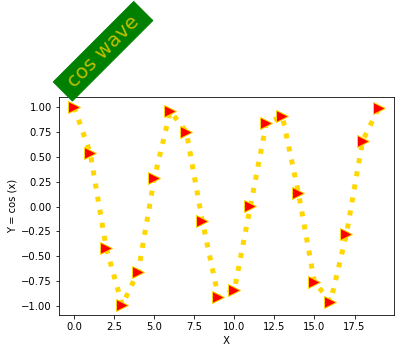

In [51]:
plt.plot(x,y,color="gold",linestyle=":",marker=">",markerfacecolor="red",markersize=12,linewidth=5)
plt.xlabel(" X ")
plt.ylabel("Y = cos (x)")
plt.title(" cos wave ",fontsize=20,color='y',loc='left',rotation=45,backgroundcolor="green")
plt.show()

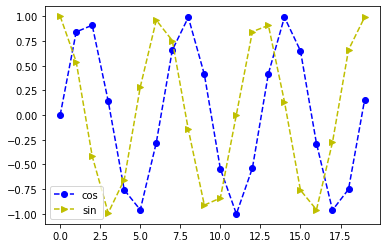

In [52]:
z=np.sin(x)
plt.plot(x,z,'b--o',x,y,'y-->')
plt.legend(["cos","sin"])
plt.show()

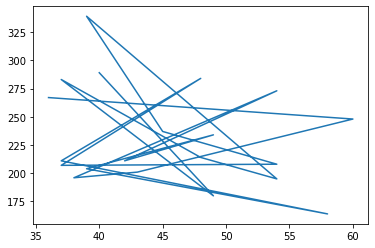

In [53]:
plt.plot(data.Age[:20],data.Cholesterol[:20])
plt.show()

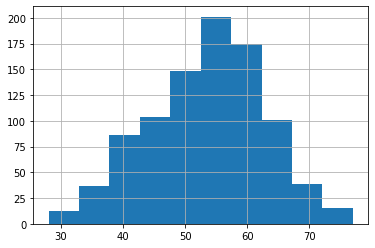

In [54]:
data.Age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C57FD7E640>,
      dtype=object)

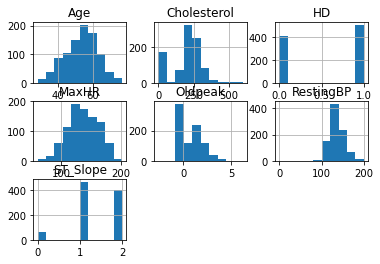

In [55]:
data.hist()

<BarContainer object of 918 artists>

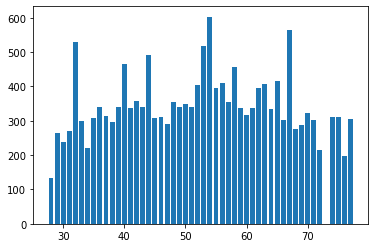

In [56]:
plt.bar(data.Age,data.Cholesterol)

<BarContainer object of 918 artists>

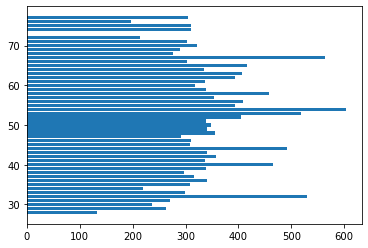

In [57]:
plt.barh(data.Age,data.Cholesterol)

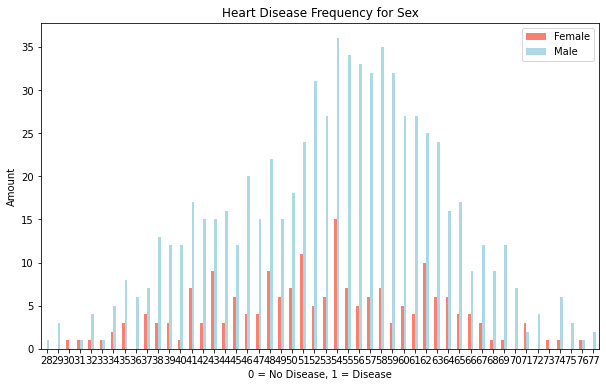

In [58]:
pd.crosstab(data.Age, data.Sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

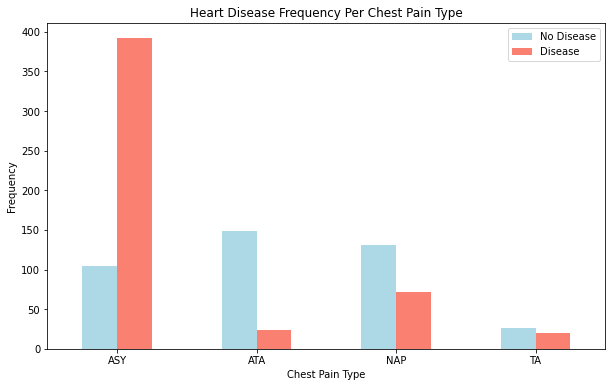

In [59]:
pd.crosstab(data.ChestPainType, data.HD).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

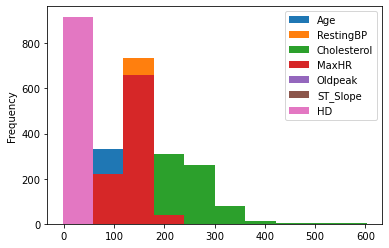

In [60]:
data.plot(kind="hist")

# Linear Regression 
#1- You can use it if the outbut is a real number (Continuous) & Labels data
#2- Linear Regression with one variable Y=a+bx  x = input , b = line , slope a = intercept with y when x = 0

In [61]:
x = data.loc[:900,["Age"]]
y = data.loc[:900,["Cholesterol"]]
x_test=data.loc[:900,["Age"]]
y_desired=data.loc[:900,["Cholesterol"]]

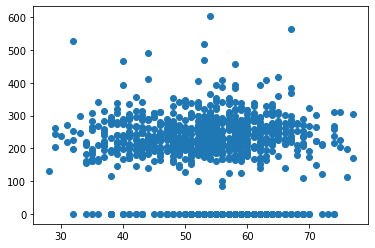

In [62]:
plt.scatter(x,y)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [65]:
model.fit(x,y)

LinearRegression()

In [66]:
y_predicted=model.predict(x_test)
y_predicted

array([[213.87508257],
       [203.65310377],
       [217.28240883],
       [204.78887919],
       [197.97422667],
       [215.01085799],
       [208.19620546],
       [197.97422667],
       [217.28240883],
       [204.78887919],
       [217.28240883],
       [193.43112498],
       [215.01085799],
       [203.65310377],
       [211.60353172],
       [197.97422667],
       [216.14663341],
       [210.4677563 ],
       [191.15957414],
       [218.41818425],
       [210.4677563 ],
       [209.33198088],
       [203.65310377],
       [209.33198088],
       [213.87508257],
       [218.41818425],
       [199.11000209],
       [200.24577751],
       [199.11000209],
       [201.38155293],
       [199.11000209],
       [195.70267582],
       [197.97422667],
       [212.73930714],
       [210.4677563 ],
       [222.96128594],
       [185.48069703],
       [212.73930714],
       [204.78887919],
       [204.78887919],
       [197.97422667],
       [197.97422667],
       [219.55395967],
       [200

In [67]:
model.intercept_

array([259.30609942])

In [68]:
model.coef_

array([[-1.13577542]])

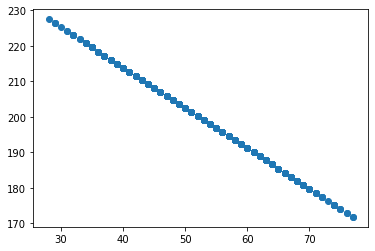

In [69]:
plt.scatter(x_test,y_predicted)

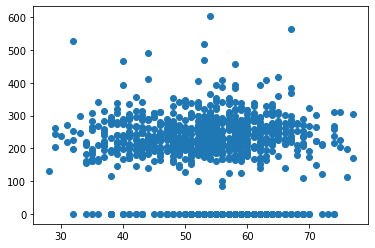

In [70]:
plt.scatter(x_test,y_desired)

In [71]:
import sklearn.metrics as mc

In [72]:
mc.mean_absolute_error(y_desired,y_predicted)

83.43002686282024

In [73]:
mc.mean_squared_error(y_desired,y_predicted)

12017.991306465727

# Multiple Linear Regression

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x=data[["Age","Cholesterol"]]
y=data.Cholesterol

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
x_test

,Age,Cholesterol
422,65,236
4,54,195
76,32,529
712,58,234
375,73,0
...,...,...
182,52,404
675,57,126
259,55,320
299,47,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,172,N,0.0,2,0
1,49,F,NAP,160,180,156,N,1.0,1,1
2,37,M,ATA,130,283,98,N,0.0,2,0
3,48,F,ASY,138,214,108,Y,1.5,1,1
4,54,M,NAP,150,195,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1
914,68,M,ASY,144,193,141,N,3.4,1,1
915,57,M,ASY,130,131,115,Y,1.2,1,1
916,57,F,ATA,130,236,174,N,0.0,1,1


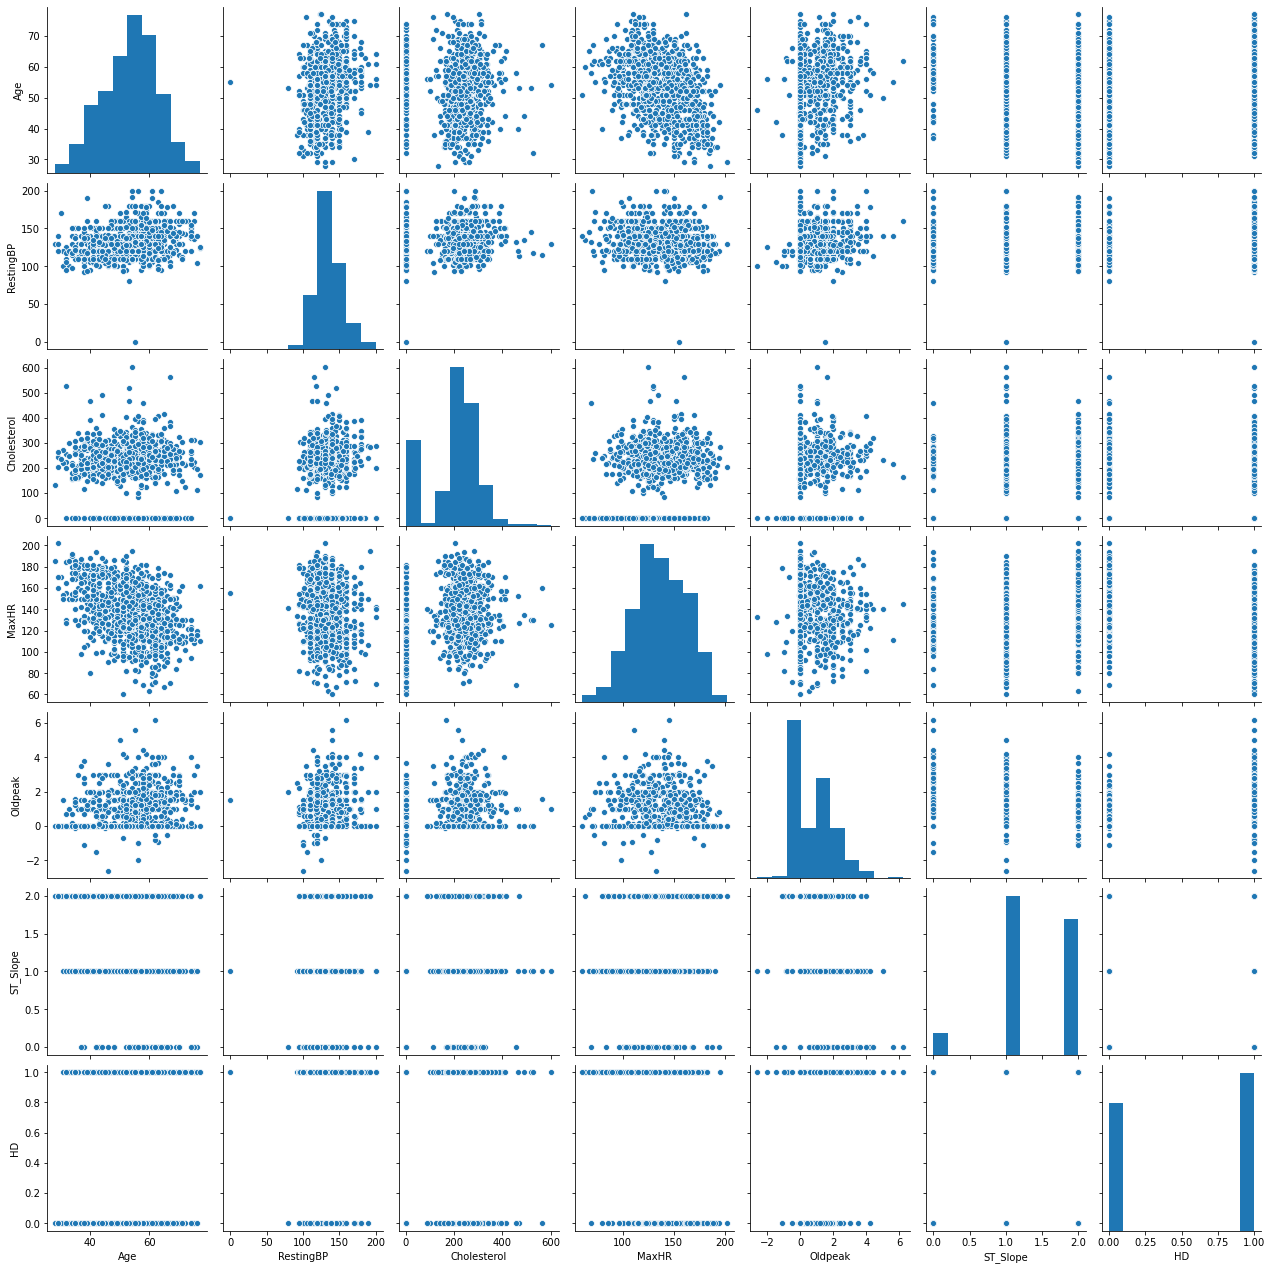

In [77]:
sns.pairplot(data)
data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C503B3C250>,
      dtype=object)

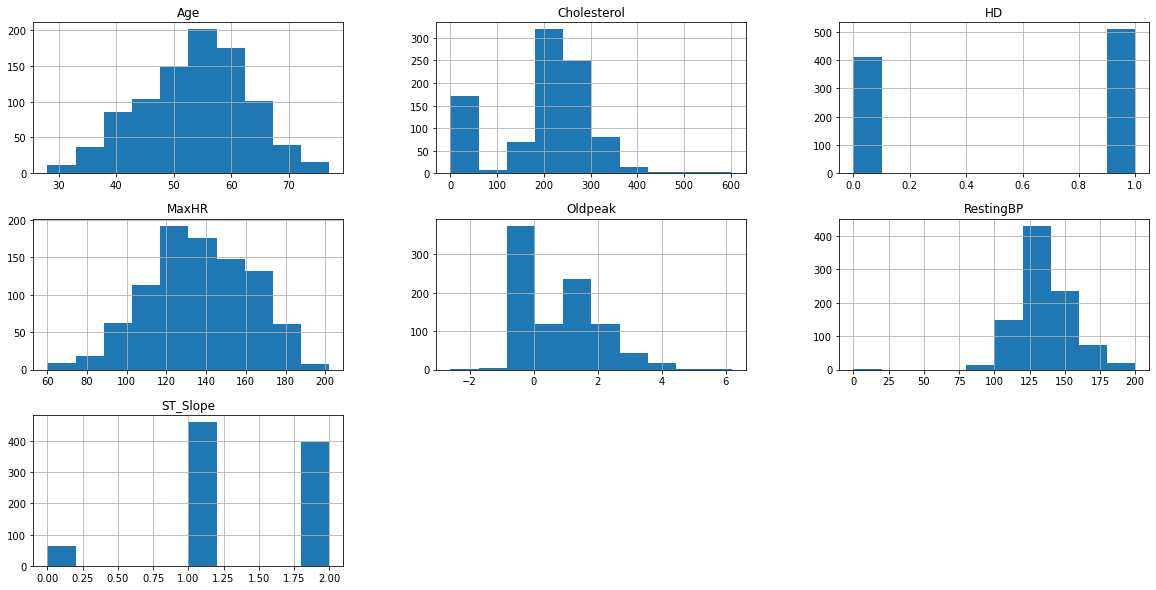

In [78]:
data.hist(figsize=(20,10))

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


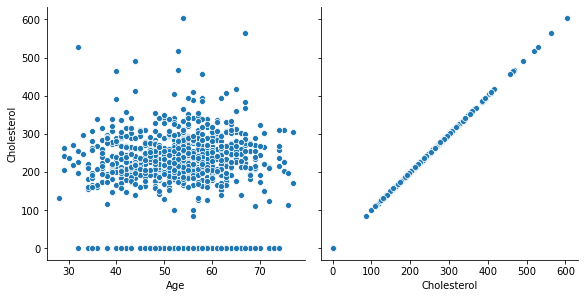

In [79]:
sns.pairplot(data,x_vars=["Age","Cholesterol"],y_vars=["Cholesterol"],kind = "scatter",size =4)

In [80]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,172,N,0.0,2,0
1,49,F,NAP,160,180,156,N,1.0,1,1
2,37,M,ATA,130,283,98,N,0.0,2,0
3,48,F,ASY,138,214,108,Y,1.5,1,1
4,54,M,NAP,150,195,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1
914,68,M,ASY,144,193,141,N,3.4,1,1
915,57,M,ASY,130,131,115,Y,1.2,1,1
916,57,F,ATA,130,236,174,N,0.0,1,1


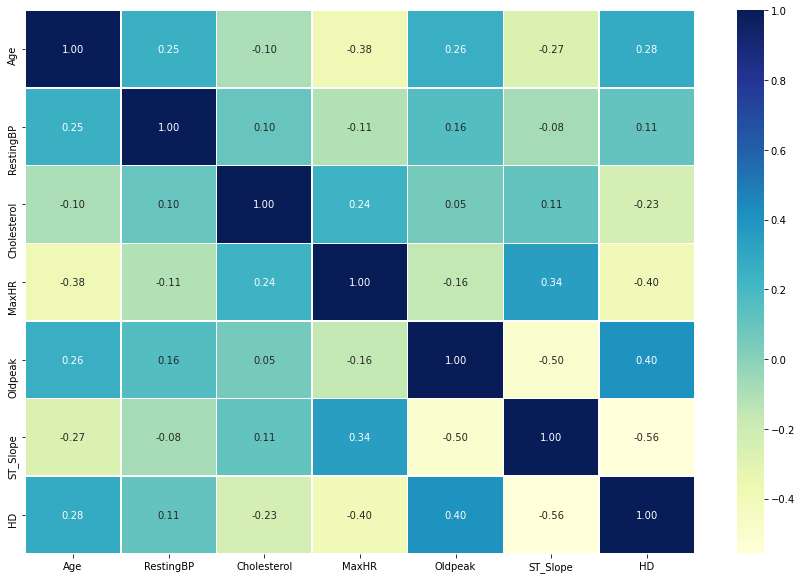

In [81]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");


In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [85]:
y_predict=model.predict(x_test)
y_predict

array([ 2.36000000e+02,  1.95000000e+02,  5.29000000e+02,  2.34000000e+02,
       -7.32467051e-15,  2.38000000e+02,  1.53000000e+02,  2.54000000e+02,
        3.85000000e+02,  2.14000000e+02,  2.26000000e+02,  1.77000000e+02,
        2.99000000e+02,  2.82000000e+02,  2.25000000e+02,  2.34000000e+02,
        2.12000000e+02,  2.39000000e+02,  2.08000000e+02,  2.19000000e+02,
        2.48000000e+02,  3.41000000e+02,  3.40000000e+02,  2.60000000e+02,
        2.43000000e+02,  2.17000000e+02,  2.97000000e+02, -1.10816774e-14,
        1.85000000e+02,  2.95000000e+02,  2.31000000e+02,  2.16000000e+02,
        3.28000000e+02, -1.22376796e-14,  2.21000000e+02,  2.20000000e+02,
        2.20000000e+02,  4.91000000e+02,  6.03000000e+02,  2.23000000e+02,
        2.98000000e+02,  1.75000000e+02,  2.89000000e+02,  3.12000000e+02,
        1.81000000e+02,  3.06000000e+02,  2.36000000e+02,  2.73000000e+02,
        2.40000000e+02,  2.06000000e+02,  3.03000000e+02, -9.05867371e-15,
        2.52000000e+02,  

In [86]:
x_test

,Age,Cholesterol
422,65,236
4,54,195
76,32,529
712,58,234
375,73,0
...,...,...
182,52,404
675,57,126
259,55,320
299,47,0


In [87]:
y_test

422    236
4      195
76     529
712    234
375      0
      ... 
182    404
675    126
259    320
299      0
484      0
Name: Cholesterol, Length: 184, dtype: int64

In [88]:
model.intercept_

-2.842170943040401e-14

In [89]:
model.coef_

array([2.89000533e-16, 1.00000000e+00])

In [90]:
import statsmodels.formula.api as sm

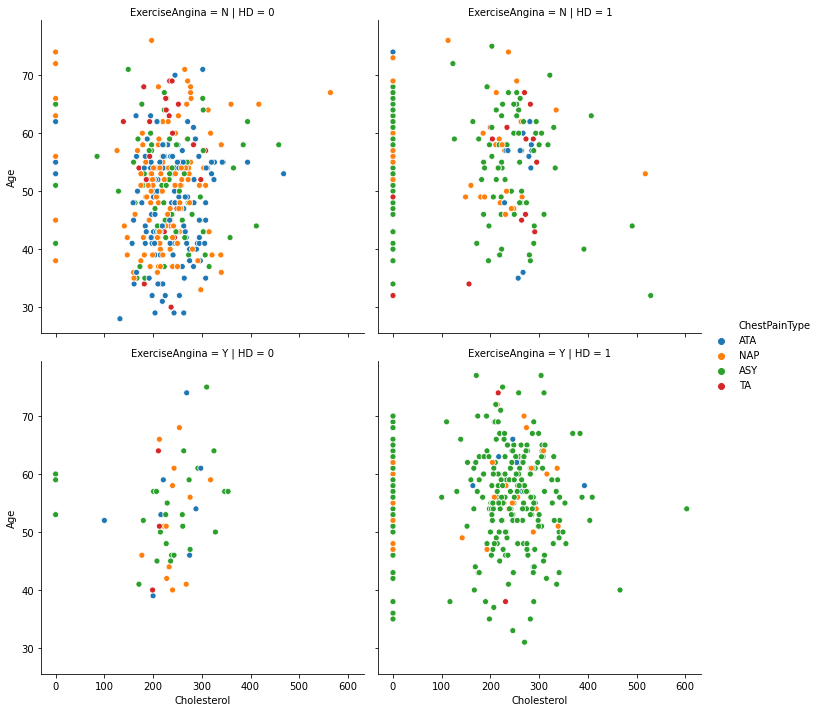

In [91]:
sns.relplot(data=data,x='Cholesterol',y='Age',kind = "scatter",hue="ChestPainType",col="HD",row="ExerciseAngina")

In [92]:
x=data["MaxHR"]
y=data.Cholesterol

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
x_train

100    115
451    122
242    143
822    154
644    130
      ... 
183    140
678    171
531    115
724    138
805    160
Name: MaxHR, Length: 734, dtype: int64

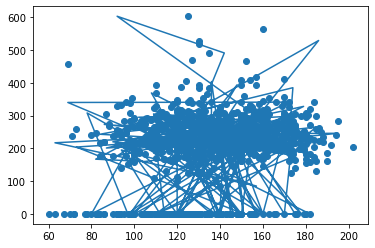

In [94]:
plt.scatter(x,y)
plt.plot(x_test,y_predict)

In [95]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,172,N,0.0,2,0
1,49,F,NAP,160,180,156,N,1.0,1,1
2,37,M,ATA,130,283,98,N,0.0,2,0
3,48,F,ASY,138,214,108,Y,1.5,1,1
4,54,M,NAP,150,195,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1
914,68,M,ASY,144,193,141,N,3.4,1,1
915,57,M,ASY,130,131,115,Y,1.2,1,1
916,57,F,ATA,130,236,174,N,0.0,1,1


In [96]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HD                0
dtype: int64

In [97]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

# Classfication

In [98]:
my_labels=data.ChestPainType.unique().tolist()
my_labels

['ATA', 'NAP', 'ASY', 'TA']

In [99]:
data.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [100]:
values=data.ChestPainType.value_counts().tolist()

In [101]:
values

[496, 203, 173, 46]

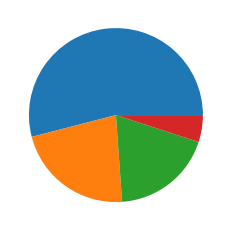

In [102]:
plt.pie(values)
plt.show()

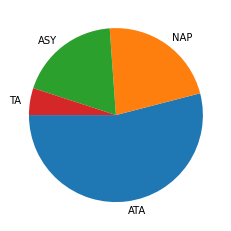

In [103]:
plt.pie(values,labels=my_labels,startangle=180)
plt.show()

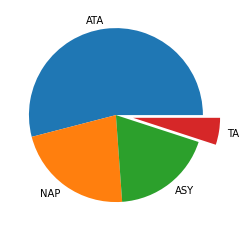

In [104]:
my_explode=[0,0,0,.2]
plt.pie(values,labels=my_labels,explode=my_explode)
plt.show()

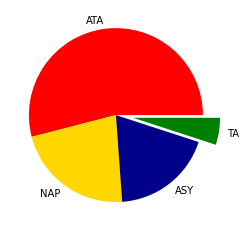

In [105]:
my_colors=["red","gold","darkblue","green"]
plt.pie(values,labels=my_labels,explode=my_explode,colors=my_colors)
plt.show()

In [106]:
x=data.iloc[:,:-1]
y=data.iloc[:,2]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,172,N,0.0,2
1,49,F,NAP,160,180,156,N,1.0,1
2,37,M,ATA,130,283,98,N,0.0,2
3,48,F,ASY,138,214,108,Y,1.5,1
4,54,M,NAP,150,195,122,N,0.0,2
...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1
914,68,M,ASY,144,193,141,N,3.4,1
915,57,M,ASY,130,131,115,Y,1.2,1
916,57,F,ATA,130,236,174,N,0.0,1


# Data Scalling 

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
#Adding New Column
data.assign(AvgRating=lambda x :x.Age / 2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD,AvgRating
0,40,M,ATA,140,289,172,N,0.0,2,0,20.0
1,49,F,NAP,160,180,156,N,1.0,1,1,24.5
2,37,M,ATA,130,283,98,N,0.0,2,0,18.5
3,48,F,ASY,138,214,108,Y,1.5,1,1,24.0
4,54,M,NAP,150,195,122,N,0.0,2,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1,22.5
914,68,M,ASY,144,193,141,N,3.4,1,1,34.0
915,57,M,ASY,130,131,115,Y,1.2,1,1,28.5
916,57,F,ATA,130,236,174,N,0.0,1,1,28.5


In [110]:
X = data.drop("ST_Slope",axis=1)
y = data["ST_Slope"]

In [111]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(918, 9)
(918,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [112]:

from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(615, 9)
(615,)
(303, 9)
(303,)


In [115]:
df_rev=X_train
df_rev

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,HD
585,57,M,ATA,180,285,120,N,0.8,1
169,58,M,NAP,140,179,160,N,0.0,0
602,61,M,NAP,120,337,98,Y,0.0,1
140,52,M,ASY,160,331,94,Y,2.5,1
173,49,M,NAP,140,187,172,N,0.0,0
...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,110,N,0.0,0
270,45,M,ASY,120,225,140,N,0.0,0
860,60,M,ASY,130,253,144,Y,1.4,1
435,60,M,ASY,152,0,118,Y,0.0,0


In [116]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,HD
668,63,F,ATA,140,195,179,N,0.0,0
30,53,M,NAP,145,518,130,N,0.0,1
377,65,M,ASY,160,0,122,N,1.2,1
535,56,M,ASY,130,0,122,Y,1.0,1
807,54,M,ATA,108,309,156,N,0.0,0
...,...,...,...,...,...,...,...,...,...
164,52,F,ATA,140,225,140,N,0.0,0
28,53,F,ATA,113,468,127,N,0.0,0
514,43,M,ASY,122,0,120,N,0.5,1
193,45,M,NAP,135,192,110,N,0.0,0


In [117]:
data.Size =data.ChestPainType.str.replace("ATA","Angine A")
data

<ipython-input-117-d93a0383fc3a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Size =data.ChestPainType.str.replace("ATA","Angine A")


,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,172,N,0.0,2,0
1,49,F,NAP,160,180,156,N,1.0,1,1
2,37,M,ATA,130,283,98,N,0.0,2,0
3,48,F,ASY,138,214,108,Y,1.5,1,1
4,54,M,NAP,150,195,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1
914,68,M,ASY,144,193,141,N,3.4,1,1
915,57,M,ASY,130,131,115,Y,1.2,1,1
916,57,F,ATA,130,236,174,N,0.0,1,1


In [118]:
data.Size =data.ChestPainType.str.replace("Varies with device","0")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HD
0,40,M,ATA,140,289,172,N,0.0,2,0
1,49,F,NAP,160,180,156,N,1.0,1,1
2,37,M,ATA,130,283,98,N,0.0,2,0
3,48,F,ASY,138,214,108,Y,1.5,1,1
4,54,M,NAP,150,195,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,132,N,1.2,1,1
914,68,M,ASY,144,193,141,N,3.4,1,1
915,57,M,ASY,130,131,115,Y,1.2,1,1
916,57,F,ATA,130,236,174,N,0.0,1,1


In [119]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,HD
585,57,M,ATA,180,285,120,N,0.8,1
169,58,M,NAP,140,179,160,N,0.0,0
602,61,M,NAP,120,337,98,Y,0.0,1
140,52,M,ASY,160,331,94,Y,2.5,1
173,49,M,NAP,140,187,172,N,0.0,0


In [120]:
y_train, len(y_train)

(585    1
 169    2
 602    1
 140    1
 173    2
       ..
 106    2
 270    2
 860    2
 435    2
 102    1
 Name: ST_Slope, Length: 615, dtype: int32,
 615)

In [121]:
y_test, len(y_test)

(668    2
 30     1
 377    1
 535    1
 807    2
       ..
 164    2
 28     2
 514    2
 193    2
 321    1
 Name: ST_Slope, Length: 303, dtype: int32,
 303)

In [122]:
#normalization
scaling=MinMaxScaler()

In [123]:
scaling.fit_transform(data[['Age','Cholesterol']])

array([[0.24489796, 0.47927032],
       [0.42857143, 0.29850746],
       [0.18367347, 0.46932007],
       ...,
       [0.59183673, 0.2172471 ],
       [0.59183673, 0.39137645],
       [0.20408163, 0.29021559]])

In [124]:
#Standrization
from sklearn.preprocessing import StandardScaler

In [125]:
scaling=StandardScaler()
x_train=scaling.fit_transform(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[144.  96. 186. 150. 178. 141. 118.  92. 174. 172. 104.  92. 175. 130.
 127. 132. 172. 106. 139. 156. 143. 172.  69.  98.  84. 150. 142. 170.
 173. 154. 126. 100. 179.  80.  99. 158. 125. 142.  92. 173. 105. 160.
 126. 110. 158. 132. 160.  86. 134. 152. 120. 120. 161. 128. 148. 100.
 154. 109. 114.  90. 137. 146. 140. 121. 149. 140. 120.  96.  82. 105.
 163. 125. 130. 176. 120. 119. 149. 103. 150. 175. 150. 112. 162. 132.
 179.  96. 148. 130.  97.  78. 160. 144. 151. 140. 155.  87. 137. 163.
 120. 145. 142. 140. 108. 137. 112. 127. 139. 153.  98. 134. 124. 138.
  92. 148. 140. 120. 117. 150. 120. 120. 120.  63. 157.  94. 112. 120.
 175. 110. 160. 122. 120. 102. 120. 130. 155. 150. 185. 133. 182. 100.
 125. 109. 135. 157. 140. 132. 140. 120. 133. 103. 180. 110. 175. 128.
 150. 106. 107. 150.  73. 151. 147. 115. 168. 160. 138. 132. 120. 150.
 195. 138. 122. 115. 114. 110. 110. 138.  92. 136. 145. 136. 136. 157.
 150. 165.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test=scaling.transform(x_test)

In [ ]:
x_train

In [ ]:
scaling.fit_transform(data[['Age','Cholesterol']])

In [ ]:
data.boxplot(figsize=(16,5))